### Importowanie potrzebnych bibliotek

Instalacja bibliotek:

```pip install numpy pandas matplotlib scipy statsmodels```

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

### Importowanie danych z pliku xslx do DataFrame


In [2]:
sheets = {}

xls = pd.ExcelFile('dane_gdansk/wszystkie_dane.xlsx') # należy zmienić ścieżkę do pliku

for sheet in xls.sheet_names:
    sheets[sheet] = xls.parse(sheet)


c:\Users\jawor\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\jawor\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


### Arkusze:

1. stan ludności
2. wg roczników
3. wskaźnik feminizacji
4. gęstość zaludnienia
5. bezrobocie - dzielnice
6. bezrobocie - wiek
7. bezrobocie - czas przebywania
8. praca - sektory ekonomiczne
9. ceny mieszkań
10. nowe mieszkania
11. przestępstwa

Analizować będziemy dane dotyczące bezrobocia i przestępczości w dzielnicach Gdańska.

Przyjmujemy:
 - X - bezrobocie (procentowy udział osób w wieku produkcyjnym bez pracy)
 - Y - przestępczość (w przeliczeniu na 1000 mieszkańców, bez rangowania typów przestępstw)

### Wydobycie analizowanych danych z DataFrame

In [3]:
a = sheets['przestępstwa'][['DZIELNICA', 'PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']]
a = a[:-2]
#a.head()

In [4]:
b = sheets['bezrobocie - dzielnice'][['DZIELNICA', 'Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']]
b=b[:-1]
#b.head()

In [5]:
#łączenie danych i zaokrąglanie do 2 miejsc po przecinku

merged_df = a.merge(b, on='DZIELNICA')
"""
merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'] = merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'].astype(float)
merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '] = merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '].astype(float)
merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'] = merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'].round(2)
merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '] = merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '].round(2)
"""
pass
merged_df.head(44)

,DZIELNICA,PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.,Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %)
0,Aniołki,19.007881,1.829026
1,Brętowo,10.225764,2.323875
2,Brzeźno,19.949676,3.109576
3,Chełm,15.111083,2.176895
4,Jasień,17.859443,1.950576
5,Kokoszki,20.408163,1.832241
6,Krakowiec-Górki Zachodznie,27.405248,5.154639
7,Letnica,73.905109,3.389831
8,Matarnia,30.924425,1.887872
9,Młyniska,46.422487,3.674746


### Wyznaczenie podstawowych statystyk - tendencja centralna

 - średnia dla zmiennych X i Y
 - mediana 
 - moda

In [6]:
# srednia mediana moda

mean_1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].mean()
mean_2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].mean()
print("Średnia przestępstw na 1000 mieszkańców: ", mean_1.values[0])
print("Średnia bezrobocia (uśredniony % w dzielnicach): ", mean_2.values[0])

median_1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].median()
median_2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].median()
print("\nMediana przestępstw na 1000 mieszkańców: ", median_1.values[0])
print("Mediana bezrobocia (mediana % w dzielnicach): ", median_2.values[0])

mode_1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].mode()
mode_2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].mode()
print("\nModa przestępstw na 1000 mieszkańców: ", mode_1.values[0][0])
print("Moda bezrobocia (moda % w dzielnicach): ", mode_2.values[0][0])

# dane od Pawła
mode_2 = 1.829026
mode_1 = 19.00788
print("\nDane od Pawła z overleaf:")
print("Moda przestępstw na 1000 mieszkańców: ", mode_1)
print("Moda bezrobocia (moda % w dzielnicach): ", mode_2)

Średnia przestępstw na 1000 mieszkańców:  26.40081728826512
Średnia bezrobocia (uśredniony % w dzielnicach):  2.7319360132982053

Mediana przestępstw na 1000 mieszkańców:  20.45514338332018
Mediana bezrobocia (mediana % w dzielnicach):  2.4603677869372222

Moda przestępstw na 1000 mieszkańców:  10.05867560771165
Moda bezrobocia (moda % w dzielnicach):  1.46524064171123

Dane od Pawła z overleaf:
Moda przestępstw na 1000 mieszkańców:  19.00788
Moda bezrobocia (moda % w dzielnicach):  1.829026


Jako, że analizowane dane się nie powtarzają, niemożliwe jest wyznaczenie najczęściej występującej wartości (moda). Przyjmujemy zatem wartość, wokół której skupia się największa liczba danych.

### Statystyki położenia - kwartyle

In [7]:
# I i III kwartyl

q1_1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].quantile(0.25)
q1_2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].quantile(0.25)
print("\nPierwszy kwartyl Y: ", q1_1.values[0])
print("Pierwszy kwartyl X: ", q1_2.values[0])

q3_1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].quantile(0.75)
q3_2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].quantile(0.75)
print("\nTrzeci kwartyl Y: ", q3_1.values[0])
print("Trzeci kwartyl X: ", q3_2.values[0])



Pierwszy kwartyl Y:  16.973426798464438
Pierwszy kwartyl X:  1.990131353597723

Trzeci kwartyl Y:  27.17201166180758
Trzeci kwartyl X:  3.2064368735601203


### Statystyki rozproszenia 
- wariancja
- odchylenie standardowe
- współczynnik zmienności
- rozstęp kwartylowy
- kwartylowy współczynnik zmienności

In [9]:

# wariancja i odchylenie standardowe
v1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].var()
print("\nWariancja Y: ", v1.values[0])
v2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].var()
print("Wariancja X: ", v2.values[0])

s1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].std()
print("\nOdchylenie standardowe Y: ", s1.values[0])
s2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].std()
print("Odchylenie standardowe X: ", s2.values[0])

# współczynnik zmiennosci
cv1 = s1.values[0]/mean_1.values[0]
print("\nWspółczynnik zmienności Y: ", cv1)
cv2 = s2.values[0]/mean_2.values[0]
print("Współczynnik zmienności X: ", cv2)

#rozstęp kwartylowy
iqr1 = q3_1.values[0] - q1_1.values[0]
print("\nRozstęp kwartylowy Y: ", iqr1)
iqr2 = q3_2.values[0] - q1_2.values[0]
print("Rozstęp kwartylowy X: ", iqr2)

# kwartylowy współczynnik zmiennosci   wzor: (Q3-Q1)/(2*mediana)
qcv1 = iqr1/(2*median_1.values[0])
print("\nKwartylowy współczynnik zmienności Y: ", qcv1)
qcv2 = iqr2/(2*median_2.values[0])
print("Kwartylowy współczynnik zmienności X: ", qcv2)





Wariancja Y:  327.47688028270403
Wariancja X:  0.8576743019045208

Odchylenie standardowe Y:  18.096322286108414
Odchylenie standardowe X:  0.9261070682726273

Współczynnik zmienności Y:  0.6854455333150627
Współczynnik zmienności X:  0.3389929572891273

Rozstęp kwartylowy Y:  10.198584863343143
Rozstęp kwartylowy X:  1.2163055199623973

Kwartylowy współczynnik zmienności Y:  0.24929145379786036
Kwartylowy współczynnik zmienności X:  0.24717961404390476


Wstępna analiza statystyk daje: śr(X) > Me(X) > D(X), stąd wniosek, że rozkład X jest prawostronnie skośny. \
Podobnie, śr(Y) > Me(Y) > D(Y), stąd wniosek, że rozkład Y jest prawostronnie skośny.\
Rozkłady zmiennych X,Y nie są symetryczne, stąd wstępnie wnioskujemy, że nie są rozkładami normalnymi.

### Klasyczne miary asymetrii i koncentracji

- trzeci moment centralny oraz względny
- czwarty moment względny

In [10]:
# trzeci moment centralny (skośność)
# wzor: ans = sum((x - x.mean())**3)/len(x)
m3_1 = merged_df[['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.']].skew()
print("\nTrzeci moment centralny Y: ", m3_1.values[0])
m3_2 = merged_df[['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ']].skew()
print("Trzeci moment centralny X: ", m3_2.values[0])

# trzeci moment względny
m3_wzgl_Y = m3_1.values[0]/(s1.values[0]**3)
print("\nTrzeci moment względny Y: ", m3_wzgl_Y)
m3_wzgl_X = m3_2.values[0]/(s2.values[0]**3)
print("Trzeci moment względny X: ", m3_wzgl_X)


# czwarty moment względny TODO


Trzeci moment centralny Y:  2.303446918412804
Trzeci moment centralny X:  0.9717737650425597

Trzeci moment względny Y:  0.0003886934676832242
Trzeci moment względny X:  1.22343689604149


Nieklasyczne miary asymetrii i koncentracji:

- kwartylowy współczynnik skośności

In [11]:
#kwartylowy współczynnik skośności

qcs1 = (q3_1.values[0] - 2*median_1.values[0] + q1_1.values[0])/(q3_1.values[0] - q1_1.values[0])
print("\nKwartylowy współczynnik skośności Y: ", qcs1)
qcs2 = (q3_2.values[0] - 2*median_2.values[0] + q1_2.values[0])/(q3_2.values[0] - q1_2.values[0])
print("Kwartylowy współczynnik skośności X: ", qcs2)



Kwartylowy współczynnik skośności Y:  0.3172157448294409
Kwartylowy współczynnik skośności X:  0.2267790853172534


Analiza klasycznych i nieklasycznych miar asymetrii i koncentracji wskazuje, że rozkłady X i Y są prawostronnie skośne.

### Wizualizacja rozkładów zmiennych X i Y - histogramy z naniesioną krzywą rozkładu normalnego

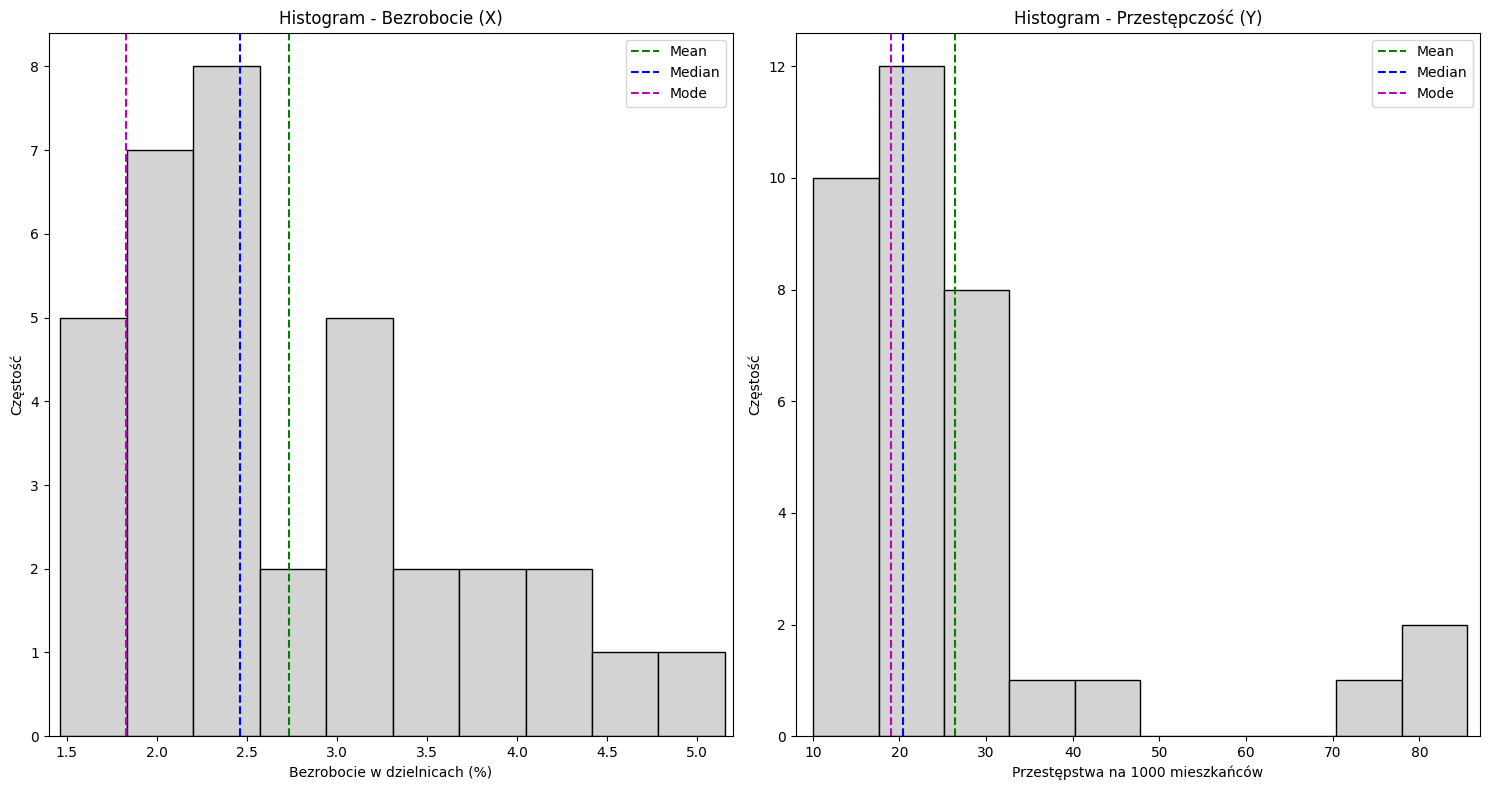

In [52]:
from scipy import stats
import matplotlib.mlab as mlab

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1 - Histogram for 'Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej'
ax1.hist(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '], bins=10, density=False, edgecolor='black', color='lightgrey')

# Add normal distribution curve
mu1, std1 = merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '].mean(), merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '].std()
x1 = np.linspace(0, 10, 100)
#ax1.plot(x1, stats.norm.pdf(x1, mu1, std1), 'r-', label='Normal Distribution')

# Add vertical lines for mean, median, and mode
ax1.axvline(x=mean_2.values[0], color='g', linestyle='--', label='Mean')
ax1.axvline(x=median_2.values[0], color='b', linestyle='--', label='Median')
ax1.axvline(x=mode_2, color='m', linestyle='--', label='Mode')

ax1.set_title("Histogram - Bezrobocie (X)")
ax1.set_xlabel("Bezrobocie w dzielnicach (%)")
ax1.set_ylabel("Częstość")
ax1.set_xlim(1.4, 5.2)
ax1.legend()

# Plot 2 - Histogram for 'PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'
ax2.hist(merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'], bins=10, density=False, edgecolor='black', color='lightgrey')

# Add normal distribution curve
mu2, std2 = merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'].mean(), merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'].std()
x2 = np.linspace(0, 100, 100)
#ax2.plot(x2, stats.norm.pdf(x2, mu2, std2/2), 'r-', label='Normal Distribution')

# Add vertical lines for mean, median, and mode
ax2.axvline(x=mean_1.values[0], color='g', linestyle='--', label='Mean')
ax2.axvline(x=median_1.values[0], color='b', linestyle='--', label='Median')
ax2.axvline(x=mode_1, color='m', linestyle='--', label='Mode')

ax2.set_title("Histogram - Przestępczość (Y)")
ax2.set_xlabel("Przestępstwa na 1000 mieszkańców")
ax2.set_ylabel("Częstość")
ax2.set_xlim(8, 87)
ax2.legend()

plt.tight_layout()
plt.show()


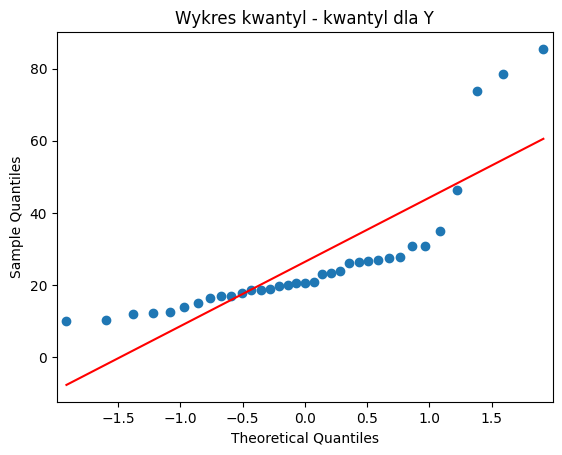

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create Q-Q plot
sm.qqplot(merged_df["PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R."], line='s')

# Set plot title and labels
plt.title("Wykres kwantyl - kwantyl dla Y")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()


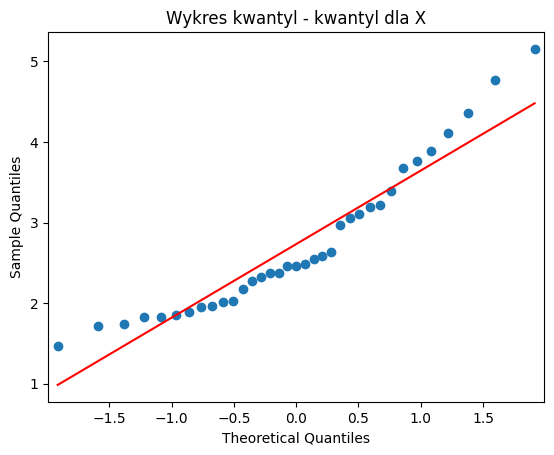

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create Q-Q plot
sm.qqplot(merged_df["Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) "], line='s')

# Set plot title and labels
plt.title("Wykres kwantyl - kwantyl dla X")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

### Test normalności rozkładu zmiennych X i Y - test Shapiro-Wilka

Wykorzystamy test Shapiro-Wilka.
Przyjmujemy:
 - H<sub>0</sub>: rozkład X/Y jest rozkładem normalnym
 - H<sub>A</sub>: rozkład X/Y nie jest rozkładem normalnym

Poziom istotności testu określamy na $\alpha$	 = 0.05

In [14]:

#test normalności Y
result = stats.shapiro(merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'])
print("Test Shapiro-Wilka dla Y: ",result) 

Test Shapiro-Wilka dla X:  ShapiroResult(statistic=0.9122641682624817, pvalue=0.008589787408709526)
Test Shapiro-Wilka dla Y:  ShapiroResult(statistic=0.6926918029785156, pvalue=2.874068343317049e-07)


Interpretacja wyniku testu:
    
W obu przypadkach p-value < $\alpha$ - odrzucamy H<sub>0</sub>, rozkład X nie jest rozkładem normalnym


    tutaj należy wstawić wykres z zaznaczonym obszarem p-value
    Można też wykonać test porównawczy, np: Anderson-Darling lub Kolmogorov-Smirnov

### test Andersona-Darlinga

In [15]:
# test Andersona-Darlinga z biblioteki statsmodels

result = sm.stats.diagnostic.normal_ad(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '])
print("statistic: ", result[0])
print("p-value: ", result[1])

statistic:  1.0481253568352287
p-value:  0.008165264117704319


Również test Andersona-Darlinga wskazuje, że rozkład X nie jest rozkładem normalnym.

### Test Kołmogorowa-Smirnowa

In [16]:
# test K-S z biblioteki statsmodels
print("Test K-S z biblioteki statsmodels dla X:")
result = sm.stats.diagnostic.kstest_normal(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '])
print("statistic: ", result[0])
print("p-value: ", result[1])

# test K-S z biblioteki scipy
print("\nTest K-S z biblioteki scipy dla X:")
result = stats.kstest(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '], 'norm')
print("statistic: ", result.statistic)
print("p-value: ", result.pvalue)


Test K-S z biblioteki statsmodels dla X:
statistic:  0.17010843064384917
p-value:  0.013361539485881325

Test K-S z biblioteki scipy dla X:
statistic:  0.9287274241952062
p-value:  1.423381462854067e-40


### Test Cramera-von Misesa

In [17]:
# test Cramera-von Misesa z biblioteki scipy

result = stats.cramervonmises(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '], 'norm')
print("statistic: ", result.statistic)
print("p-value: ", result.pvalue)

statistic:  10.921420207777452
p-value:  1.7931234275181396e-10


Testy alternatywne dla testu Shapiro-Wilka również wskazują, że rozkład X nie jest rozkładem normalnym.

### Test Mardia - Badanie zgodności pary (X,Y) z dwuwymiarowym rozkładem normalnym

Test przeprowadzony w środowisku R:

![alt text](image.png "Title")

### Test korelacji Spearmana

In [18]:
#spearman test
res = stats.spearmanr(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '], merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'])
print("Test korelacji Spearmana dla XY: ", res)

Test korelacji Spearmana dla XY:  SignificanceResult(statistic=0.4957983193277311, pvalue=0.0024557687531439713)


Interpretacja wyników testu normalności oraz korelacji Spearmana...

### Grupowanie danych w $k$ klas, zastosowanie testu $\chi^2$ 

Przyjmujemy poziom istotności testu $\alpha$ = 0.05. 

 - H<sub>0</sub>: zmienne X, Y są wzajemnie zależne
 - H<sub>A</sub>: zmienne X, Y są niezależne

In [24]:
# grupowanie danych w k klas
k = 8
merged_df['X_k'] = pd.cut(merged_df['Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) '], k)
merged_df['Y_k'] = pd.cut(merged_df['PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.'], k)
merged_df.head()

,DZIELNICA,PRZESTĘPSTWA NA 1000 MIESZKAŃCÓW W 2022 R.,Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %),X_k,Y_k
0,Aniołki,19.007881,1.829026,"(1.462, 1.926]","(9.983, 19.487]"
1,Brętowo,10.225764,2.323875,"(1.926, 2.388]","(9.983, 19.487]"
2,Brzeźno,19.949676,3.109576,"(2.849, 3.31]","(19.487, 28.916]"
3,Chełm,15.111083,2.176895,"(1.926, 2.388]","(9.983, 19.487]"
4,Jasień,17.859443,1.950576,"(1.926, 2.388]","(9.983, 19.487]"


In [25]:
# how many observations in each class
print(merged_df.groupby('X_k').size())
print(merged_df.groupby('Y_k').size())



X_k
(1.462, 1.926]    7
(1.926, 2.388]    9
(2.388, 2.849]    6
(2.849, 3.31]     5
(3.31, 3.771]     3
(3.771, 4.232]    2
(4.232, 4.693]    1
(4.693, 5.155]    2
dtype: int64
Y_k
(9.983, 19.487]     14
(19.487, 28.916]    14
(28.916, 38.344]     3
(38.344, 47.773]     1
(47.773, 57.201]     0
(57.201, 66.63]      0
(66.63, 76.059]      1
(76.059, 85.487]     2
dtype: int64


C:\Users\jawor\AppData\Local\Temp\ipykernel_13896\2083833705.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby('X_k').size())
C:\Users\jawor\AppData\Local\Temp\ipykernel_13896\2083833705.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby('Y_k').size())


In [26]:
# chi square test
obs = pd.crosstab(merged_df['X_k'], merged_df['Y_k'])
res = stats.chi2_contingency(obs)
print("Tabela kontyngencji: ")
print(obs)
print("\nTest chi-kwadrat: ")
print("statistic: ", res[0])
print("p-value: ", res[1])

Tabela kontyngencji: 
Y_k             (9.983, 19.487]  (19.487, 28.916]  (28.916, 38.344]  \
X_k                                                                   
(1.462, 1.926]                3                 3                 1   
(1.926, 2.388]                7                 2                 0   
(2.388, 2.849]                3                 2                 1   
(2.849, 3.31]                 1                 2                 1   
(3.31, 3.771]                 0                 1                 0   
(3.771, 4.232]                0                 2                 0   
(4.232, 4.693]                0                 1                 0   
(4.693, 5.155]                0                 1                 0   

Y_k             (38.344, 47.773]  (66.63, 76.059]  (76.059, 85.487]  
X_k                                                                  
(1.462, 1.926]                 0                0                 0  
(1.926, 2.388]                 0                0        

In [27]:
# chi square test z biblioteki statsmodels
res = sm.stats.Table(obs).test_nominal_association()
print("Test chi-kwadrat z biblioteki statsmodels:")
print("statistic: ", res.statistic)
chi = res.statistic
print("p-value: ", res.pvalue)
print("dof: ", res.df)

Test chi-kwadrat z biblioteki statsmodels:
statistic:  12.439818761785016
p-value:  0.9998461376602504
dof:  35


### Współczynnik kontyngencji V Cramera

In [28]:
# współczynnik kontyngencji V-Cramera
print("\nWspółczynnik kontyngencji V-Cramera: ", np.sqrt(res.statistic/(res.statistic + res.df)))


Współczynnik kontyngencji V-Cramera:  0.5120772901305733


C:\Users\jawor\AppData\Local\Temp\ipykernel_24024\256088821.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


[<class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>]


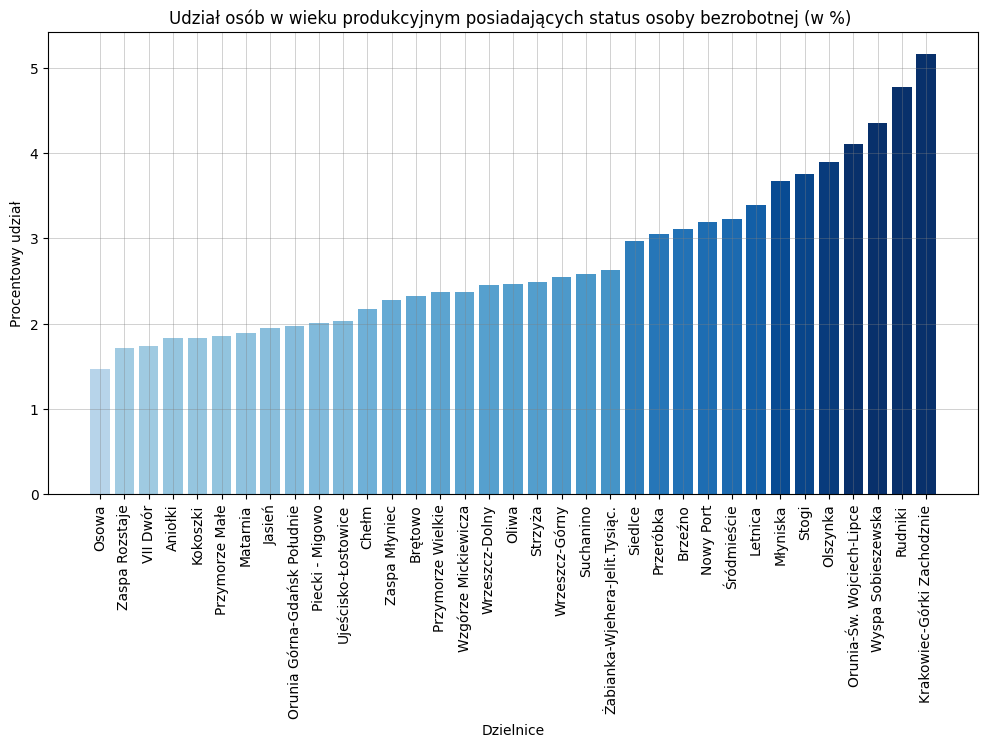

In [55]:
plt.figure(figsize=(12, 6))

# Define the colormap
cmap = plt.cm.get_cmap('Blues')

sorted_df = merged_df.sort_values(by="Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) ", ascending=True)

# Normalize the values
normalized_values = (sorted_df["Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) "] - sorted_df["Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) "].min()/4) / (sorted_df["Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) "].max() - sorted_df["Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) "].min())
# Plot the bar chart with color mapping
plt.bar(sorted_df["DZIELNICA"], sorted_df["Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej\n(w %) "], color=cmap(normalized_values))
print([type(x) for x in normalized_values])
plt.xlabel("Dzielnice")
plt.ylabel("Procentowy udział")
plt.title("Udział osób w wieku produkcyjnym posiadających status osoby bezrobotnej (w %) ")
plt.xticks(rotation=90)

# Set the grid size to match the number of bars
plt.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.grid(axis='x', which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)

plt.show()


C:\Users\jawor\AppData\Local\Temp\ipykernel_24024\3904869144.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


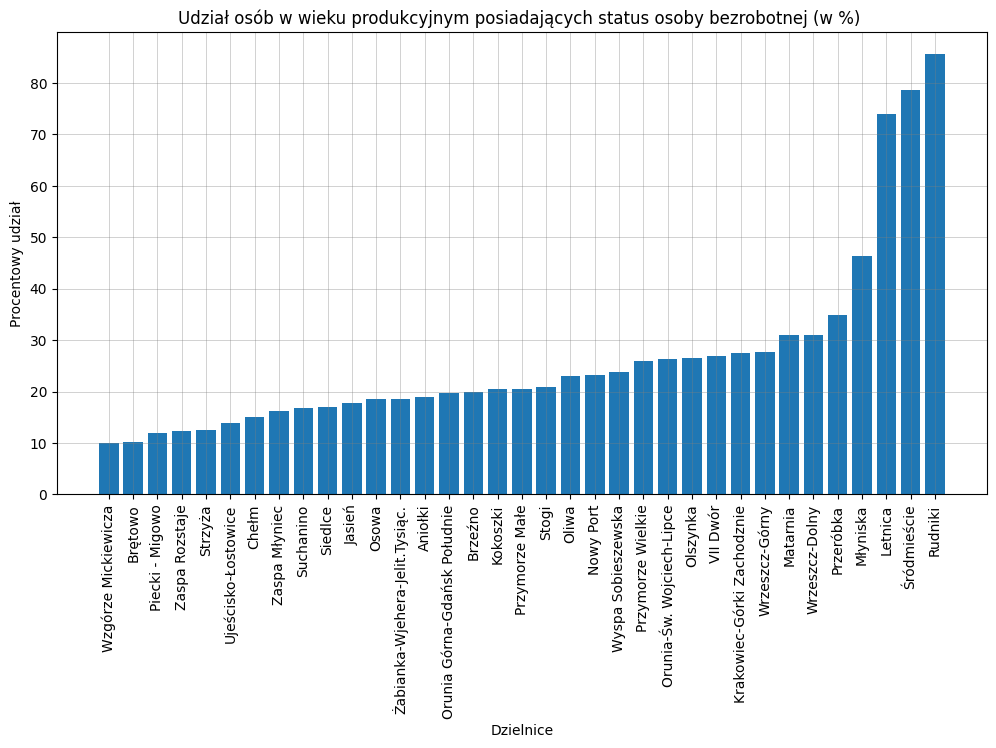